# Fraud Detection Model Using Clustering and Anomaly Detection

## About Dataset
This dataset provides a detailed look into transactional behavior and financial activity patterns, ideal for exploring fraud detection and anomaly identification. It contains 2,512 samples of transaction data, covering various transaction attributes, customer demographics, and usage patterns. Each entry offers comprehensive insights into transaction behavior, enabling analysis for financial security and fraud detection applications.

### **Key Features:**

- **TransactionID:** Unique alphanumeric identifier for each transaction.
- **AccountID:** Unique identifier for each account, with multiple transactions per account.
- **TransactionAmount:** Monetary value of each transaction, ranging from small everyday expenses to larger purchases.
- **TransactionDate:** Timestamp of each transaction, capturing date and time.
- **TransactionType:** Categorical field indicating 'Credit' or 'Debit' transactions.
- **Location:** Geographic location of the transaction, represented by U.S. city names.
- **DeviceID:** Alphanumeric identifier for devices used to perform the transaction.
- **IP Address:** IPv4 address associated with the transaction, with occasional changes for some accounts.
- **MerchantID:** Unique identifier for merchants, showing preferred and outlier merchants for each account.
- **AccountBalance:** Balance in the account post-transaction, with logical correlations based on transaction type and amount.
- **PreviousTransactionDate:** Timestamp of the last transaction for the account, aiding in calculating transaction frequency.
- **Channel:** Channel through which the transaction was performed (e.g., Online, ATM, Branch).
- **CustomerAge:** Age of the account holder, with logical groupings based on occupation.
- **CustomerOccupation:** Occupation of the account holder (e.g., Doctor, Engineer, Student, Retired), reflecting income patterns.
- **TransactionDuration:** Duration of the transaction in seconds, varying by transaction type.
- **LoginAttempts:** Number of login attempts before the transaction, with higher values indicating potential anomalies.

This dataset is ideal for data scientists, financial analysts, and researchers looking to analyze transactional patterns, detect fraud, and build predictive models for financial security applications. The dataset was designed for machine learning and pattern analysis tasks and is not intended as a primary data source for academic publications.

## Importing the Libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')


### Load data

In [5]:
df = pd.read_csv("bank_transactions_data_2.csv")
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [6]:
df.shape

(2512, 16)

### data info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

O dataset contém informações de 2.512 transações (cada linha representa uma transação) e 16 colunas (características das transações e clientes). 

__Tipos de dados:__
- 11 colunas possuem dados categóricos (texto ou IDs).
- 3 colunas possuem dados numéricos inteiros.
- 2 colunas possuem valores numéricos decimais.


### Missing values

In [10]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Não há valores nulos: Todas as colunas têm dados completos.

In [11]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


### Descriptive statistics

In [13]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Colunas Numéricas

1.TransactionAmount (Valor da Transação):
- Média: $297,59
- Desvio Padrão: R$291,95 (indicando grande variação entre transações).
- Valores mínimos e máximos: R$0,26 e R$1.919,11.
- Mediana: R$211,14 (metade das transações está abaixo desse valor).

2.CustomerAge (Idade do Cliente):
- Média: 44,67 anos.
- Idades variam entre: 18 e 80 anos.
- Mediana: 45 anos.

3.TransactionDuration (Duração da Transação):
- Média: 119,64 segundos.
- Duração mínima e máxima: 10 e 300 segundos.
- Mediana: 112,5 segundos.

4.LoginAttempts (Tentativas de Login):
- Média: 1,12 tentativas.
- Máximo: 5 tentativas.

5.AccountBalance (Saldo da Conta):
* Média: R$5.114,30.
* Variação significativa: entre R$101,25 e R$14.977,99.
- Mediana: R$4.735,51.

**Descriptive statistics of categorical columns**

In [15]:
df.describe(include ='object')

,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512
unique,2512,495,2512,2,43,681,592,100,3,4,360
top,TX000001,AC00362,2023-04-11 16:29:14,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,1,12,1,1944,70,9,13,45,868,657,16


### Colunas Categóricas

__1.TransactionType (Tipo de Transação)__:
- __Tipos distintos__: Débito e Crédito.
- __Mais frequente__: Débito (1.944 ocorrências).

__2.Location (Local)__:
- __Total de localidades__: 43.
- __Mais comum__: “Fort Worth” (70 ocorrências).

__3.CustomerOccupation (Ocupação do Cliente)__:
- __Categorias distintas__: 4 (ex.: Estudante, Profissional, etc.).
- __Mais comum__: Estudante (868 ocorrências).

__4.Channel (Canal)__:
- __Opções distintas__: 3 (ex.: Agência, App).
- __Mais comum__: “Branch” (Agência).

__5.Datas__: Transações variam em datas, sendo cada registro único.

### Check Unique Value Counts for Key Identifiers

In [17]:
print("\nUnique Accounts:", df['AccountID'].nunique())
print("Unique Devices:", df['DeviceID'].nunique())
print("Unique Locations:", df['Location'].nunique())
print("Unique Merchants:", df['MerchantID'].nunique())


Unique Accounts: 495
Unique Devices: 681
Unique Locations: 43
Unique Merchants: 100


## Exploratory Data Analysis

### Transaction Amount Distribution

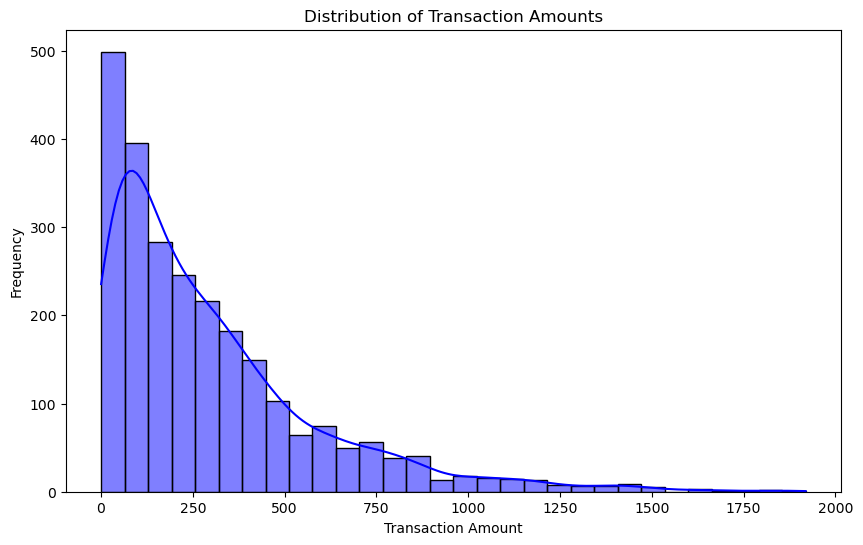

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.savefig('Distribution of Transaction Amounts.png')
plt.show()


O gráfico mostra a distribuição dos valores das transações. Aqui está um resumo simples:

__1.Forma da distribuição__: A maioria das transações possui valores baixos, concentrando-se entre 0 e 250.
Conforme o valor aumenta, o número de transações diminui, indicando uma distribuição assimétrica positiva (com longa cauda à direita).

__2.Frequência máxima__: Transações de menor valor (< 250) são as mais comuns, com mais de 500 ocorrências no intervalo inicial.

__3.Valores mais altos__: Transações acima de R$1.000 são raras, com uma frequência muito baixa.

__4.Interpretação prática__: A maioria dos clientes faz transações de valores menores, enquanto apenas alguns realizam transações de alto valor.


### Distribution of Transaction Types

In [73]:
df['TransactionType'].value_counts(ascending=False)

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

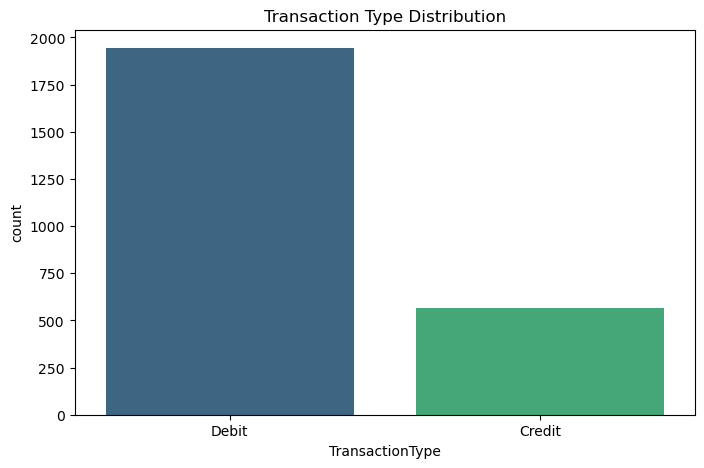

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TransactionType', palette='viridis')
plt.title("Transaction Type Distribution")
plt.savefig('Transaction Type Distribution.png')
plt.show()

O gráfico mostra a distribuição dos tipos de transações __(Débito e Crédito)__. Aqui está um resumo fácil de entender:

__1. Transações de Débito__: São as mais comuns, representando a grande maioria (cerca de 1.944 transações). Claramente dominam em relação às transações de Crédito.

__2. Transações de Crédito__: Bem menos frequentes, com cerca de 568 transações.

__3. Resumo geral__: Há significativamente mais transações de Débito do que de Crédito, indicando que a maioria das pessoas prefere (ou está limitada a) usar Débito.

### Transaction Amount Distribution and Outliers

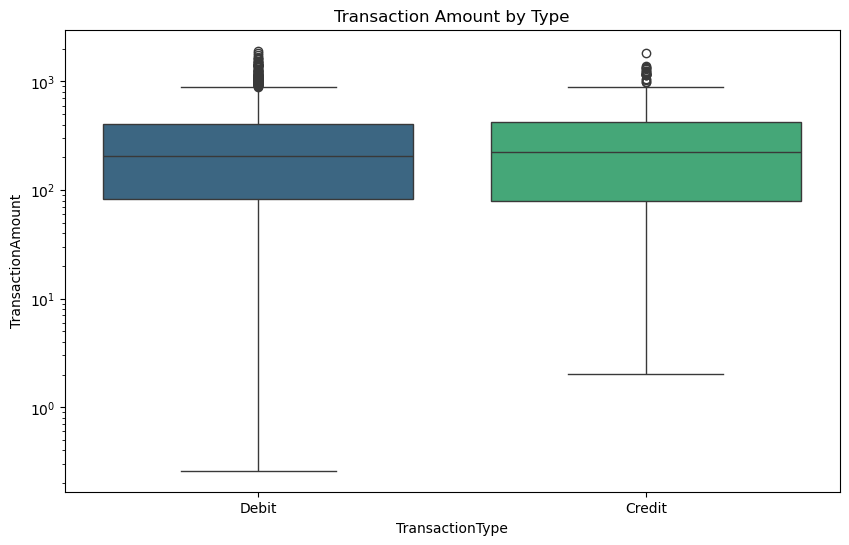

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TransactionType', y='TransactionAmount', palette='viridis')
plt.yscale('log')  # Log scale to show outliers
plt.title("Transaction Amount by Type")
plt.savefig('Transaction Amount by Type.png')
plt.show()

O gráfico de caixa (boxplot) compara os valores das transações (TransactionAmount) entre os tipos Débito e Crédito. Aqui está uma análise simples:

__1. Valores Centrais__: A mediana (linha central no boxplot) para ambos os tipos é próxima, indicando valores medianos similares para Débito e Crédito.

__2. Variação__: As transações de Débito possuem uma maior dispersão (caixa e bigodes mais longos), indicando maior variação nos valores. Créditos têm uma dispersão ligeiramente menor.

__3. Outliers__: Ambos os tipos apresentam outliers (valores extremos), especialmente no intervalo superior, com algumas transações de valores significativamente altos.

__4. Escala__: A escala é logarítmica, o que sugere uma concentração maior de transações de valores menores em ambos os tipos.

__Resumo:__ Embora os valores medianos de Débito e Crédito sejam semelhantes, as transações de Débito apresentam maior variação e frequência de valores extremos.

### Transaction Amount by Age Group (Customer Demographics)

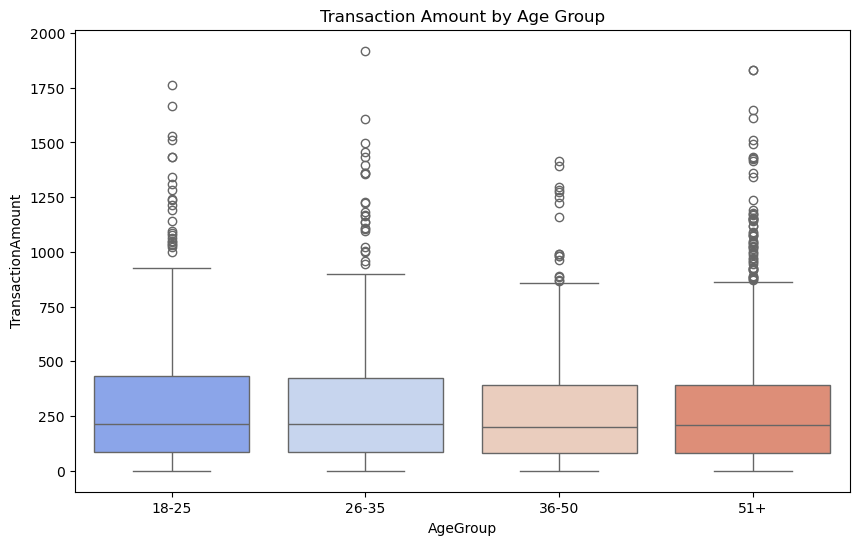

In [27]:
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=[0, 25, 35, 50, 100], labels=['18-25', '26-35', '36-50', '51+'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AgeGroup', y='TransactionAmount', palette='coolwarm')
plt.title("Transaction Amount by Age Group")
plt.savefig('Transaction Amount by Age Group.png')
plt.show()

O gráfico de caixa (boxplot) mostra a distribuição dos valores das transações (TransactionAmount) para diferentes grupos etários. Aqui está uma análise simplificada:

__1. Faixas Etárias__: Grupos analisados: 18-25, 26-35, 36-50, 51+.

__2. Média e Mediana__: A mediana dos valores das transações é relativamente próxima entre todos os grupos etários.
O grupo 51+ parece ter uma mediana ligeiramente maior, indicando que, em média, os valores das transações são um pouco mais altos para pessoas acima de 51 anos.

__3. Variação__: Todos os grupos apresentam uma dispersão ampla nos valores das transações. Valores maiores que 1.000 são mais comuns nos grupos 36-50 e 51+, embora presentes em todos os grupos.

__4. Outliers__: Todos os grupos possuem outliers, representando transações de valores significativamente altos. O grupo 51+ parece ter uma maior concentração de transações de alto valor entre os outliers.

__Resumo__:

Os valores das transações são consistentes entre os grupos etários, mas indivíduos com mais de 51 anos tendem a realizar transações ligeiramente maiores e mais frequentes de alto valor.

### Daily Transaction Count (Time-based Analysis)

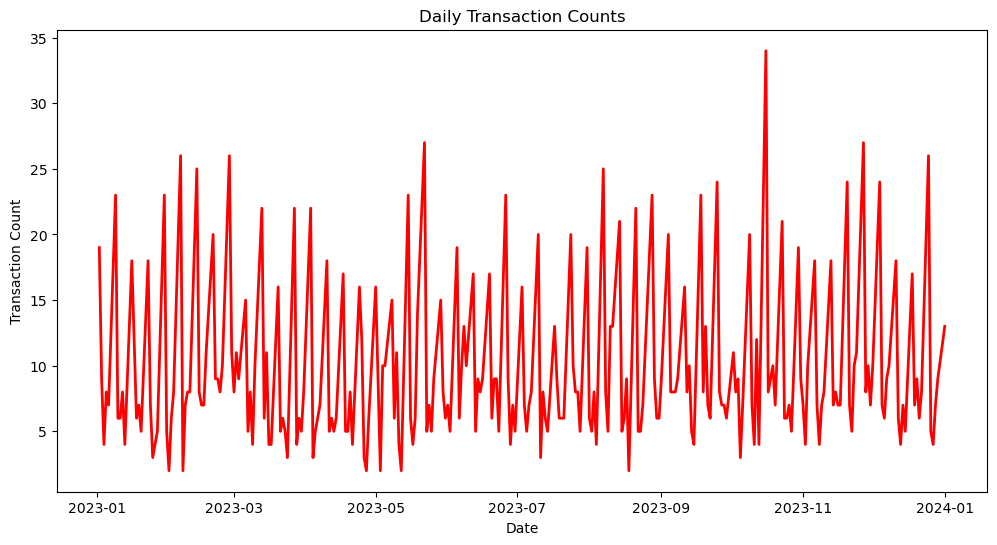

In [29]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionDay'] = df['TransactionDate'].dt.date
daily_counts = df.groupby('TransactionDay').size()
plt.figure(figsize=(12, 6))
daily_counts.plot(title="Daily Transaction Counts", color='red', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Transaction Count")
plt.savefig('Daily Transaction Counts.png')
plt.show()

O gráfico mostra a contagem diária de transações ao longo do tempo. Aqui está um resumo simples:

__1. Tendência Geral__: Há uma variação significativa no número de transações diárias, com contagens oscilando entre valores baixos (próximos de 5) e altos (próximos de 35).

__2. Padrões Cíclicos__: Picos e vales sugerem que o volume de transações pode estar relacionado a dias específicos ou sazonalidade (ex.: dias da semana ou meses).

__3. Flutuações__: O número de transações não se mantém constante e apresenta altos e baixos regularmente.

__4. Período Coberto__: As transações são registradas ao longo de aproximadamente um ano, começando em 2023-01 e terminando próximo de 2024-01.

__5. Resumo Geral__: A quantidade de transações é altamente variável, sem uma tendência clara de aumento ou diminuição, mas com vários picos.


### Transaction Count by Day of the Week

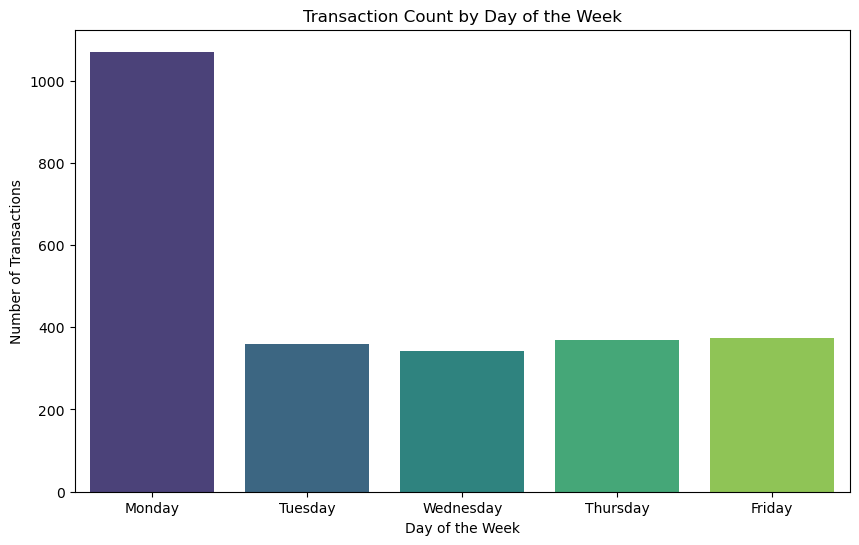

In [31]:
# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract the day of the week
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()

# Plot transaction count by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], palette='viridis')
plt.title('Transaction Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.savefig('Transaction Count by Day of the Week.png')
plt.show()


O gráfico mostra o número de transações realizadas em cada dia da semana. Aqui está um resumo claro:

__1. Dias com Mais Transações__: Segunda-feira tem o maior número de transações, com mais de 1.000 registros, destacando-se significativamente dos outros dias.

__2. Dias com Menos Transações__: De terça a sexta-feira, o número de transações é muito menor e relativamente uniforme, com cerca de 400 transações por dia.

__3. Resumo Geral__: A atividade de transações é muito maior às segundas-feiras, enquanto os outros dias apresentam padrões semelhantes, mas com volume significativamente menor.

### Analyzing Transaction Times for Anomalies

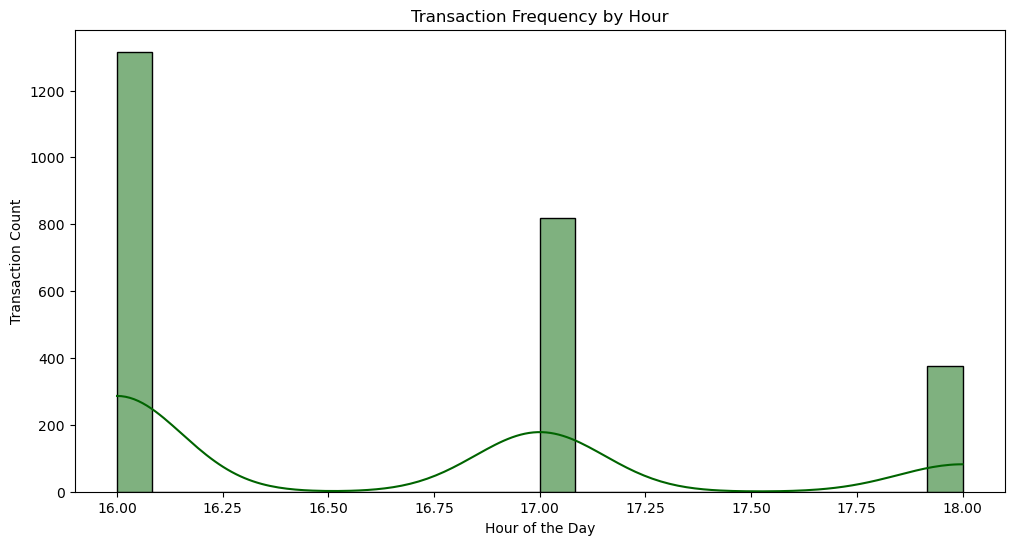

In [33]:
df['Hour'] = df['TransactionDate'].dt.hour
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Hour', kde=True, bins=24, color='darkgreen')
plt.title("Transaction Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Transaction Count")
plt.savefig('Transaction Frequency by Hour.png')
plt.show()

O gráfico mostra a frequência de transações por hora do dia. Aqui está um resumo simples:

__1. Horários com Maior Frequência__: 16:00 apresenta a maior quantidade de transações, com mais de 1.200 registros. 17:00 também é um horário de alta atividade, mas com uma frequência menor que 16:00.

__2. Horários Menos Frequentes__: Entre 16:30 e 17:30, a frequência de transações diminui significativamente, com alguns picos menores próximos às bordas do intervalo.

__3. Padrão Geral__: Há dois picos principais (16:00 e 17:00), seguidos de uma redução nas transações à medida que o horário avança.

__Interpretação__:

Esses picos podem estar relacionados a horários específicos de operações financeiras, como final de expediente ou horários preferidos dos usuários para realizar transações. A redução após os picos pode indicar menor atividade no fim do período.

### Top Locations by Transaction Volume

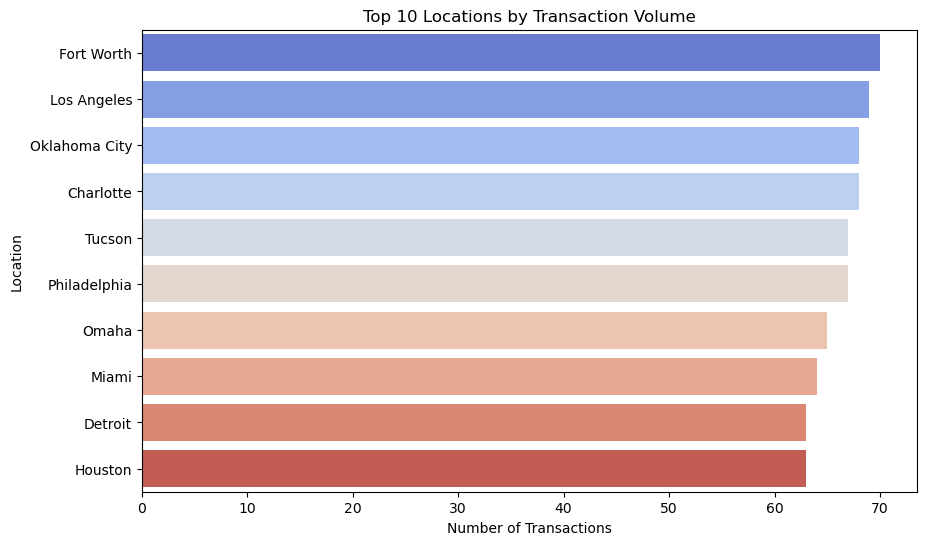

In [35]:
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_locations.index, x=top_locations.values, palette='coolwarm')
plt.title('Top 10 Locations by Transaction Volume')
plt.xlabel('Number of Transactions')
plt.ylabel('Location')
plt.savefig('Top 10 Locations by Transaction Volume.png')
plt.show()


O gráfico mostra os 10 principais locais com maior volume de transações. Aqui está o resumo:

__1. Local com Mais Transações__: Fort Worth lidera, com aproximadamente 70 transações.

__2. Outros Locais Relevantes__: Los Angeles e Oklahoma City ocupam o segundo e terceiro lugares, com um número de transações ligeiramente menor que Fort Worth. Charlotte e Tucson seguem na lista com volumes similares.

__3. Locais com Menor Volume no Top 10__: Detroit e Houston ocupam as últimas posições do ranking, mas ainda apresentam cerca de 50 transações cada.

__Resumo Geral__: O volume de transações é distribuído de forma relativamente uniforme entre os locais do Top 10, com Fort Worth se destacando como o local mais ativo.

### Customer Age Distribution by Transaction Type

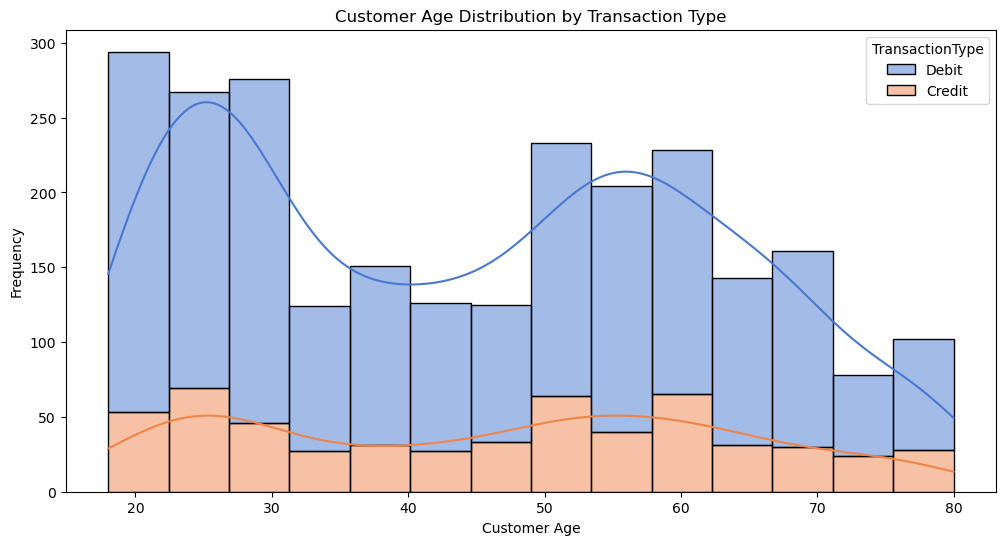

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='CustomerAge', hue='TransactionType', multiple='stack', palette='muted', kde=True)
plt.title('Customer Age Distribution by Transaction Type')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.savefig('Customer Age Distribution by Transaction Type.png')
plt.show()


O gráfico apresenta a distribuição das idades dos clientes em relação aos tipos de transação (Débito e Crédito). Aqui está o resumo:

Distribuição Geral:

__1. Idades com Mais Transações__: Clientes entre 20 e 30 anos realizam o maior número de transações, principalmente no tipo Débito. A frequência diminui gradualmente após os 30 anos.

__2. Tipos de Transação__:
- Débito: Predomina em todas as faixas etárias, com maior concentração entre os jovens (20-30 anos).
- Crédito: Embora menos comum, é mais distribuído entre as faixas etárias, com um leve aumento na frequência em idades mais avançadas (50-60 anos).

__3. Tendência por Faixa Etária__: Há um declínio gradual no volume de transações com o aumento da idade, especialmente para transações de Débito. Transações de Crédito apresentam uma leve tendência de estabilização em idades acima de 50 anos.

__Resumo Geral:__ Clientes mais jovens (20-30 anos) são os mais ativos em termos de transações, principalmente no tipo Débito. À medida que os clientes envelhecem, a frequência de transações diminui, mas o tipo Crédito se mantém relativamente constante.


### Account Balance vs. Transaction Amount

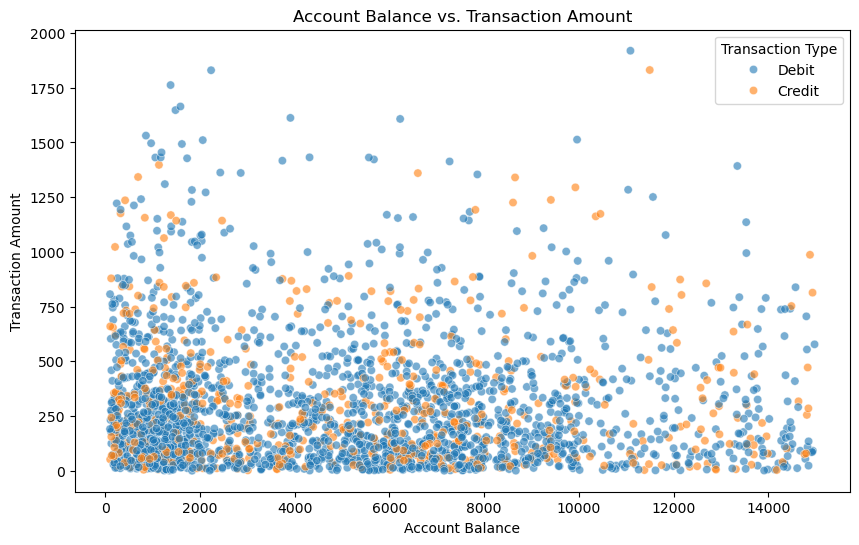

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AccountBalance', y='TransactionAmount', hue='TransactionType', alpha=0.6)
plt.title('Account Balance vs. Transaction Amount')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.legend(title='Transaction Type')
plt.savefig('Account Balance vs. Transaction Amount.png')
plt.show()


O gráfico de dispersão mostra a relação entre o saldo da conta (Account Balance) e o valor da transação (Transaction Amount), diferenciando os tipos de transação (Débito e Crédito). Aqui está uma análise simples:

Padrões Observados:

__1. Distribuição Geral__: A maioria das transações ocorre em saldos de contas abaixo de R$8.000 e valores de transação abaixo de R$500, independentemente do tipo de transação. Existem pontos dispersos (outliers) com altos valores de transação e saldos maiores.

__2. Débito (Azul)__: Transações de débito estão amplamente distribuídas, concentrando-se em valores menores, com poucas transações acima de R$1.000. Mesmo com saldos elevados, os valores de débito tendem a se manter baixos.

__3. Crédito (Laranja)__: Transações de crédito são menos frequentes, mas tendem a aparecer em valores ligeiramente mais altos do que transações de débito. Em contas com saldos altos (acima de R$10.000), transações de crédito são mais visíveis.

__Tendências Gerais__:
Não há uma correlação forte entre o saldo da conta e o valor da transação, sugerindo que clientes com saldos altos não necessariamente realizam transações de valores maiores. Transações de crédito estão mais associadas a valores de transação maiores em comparação às de débito.


### Correlation Analysis for Numeric Columns

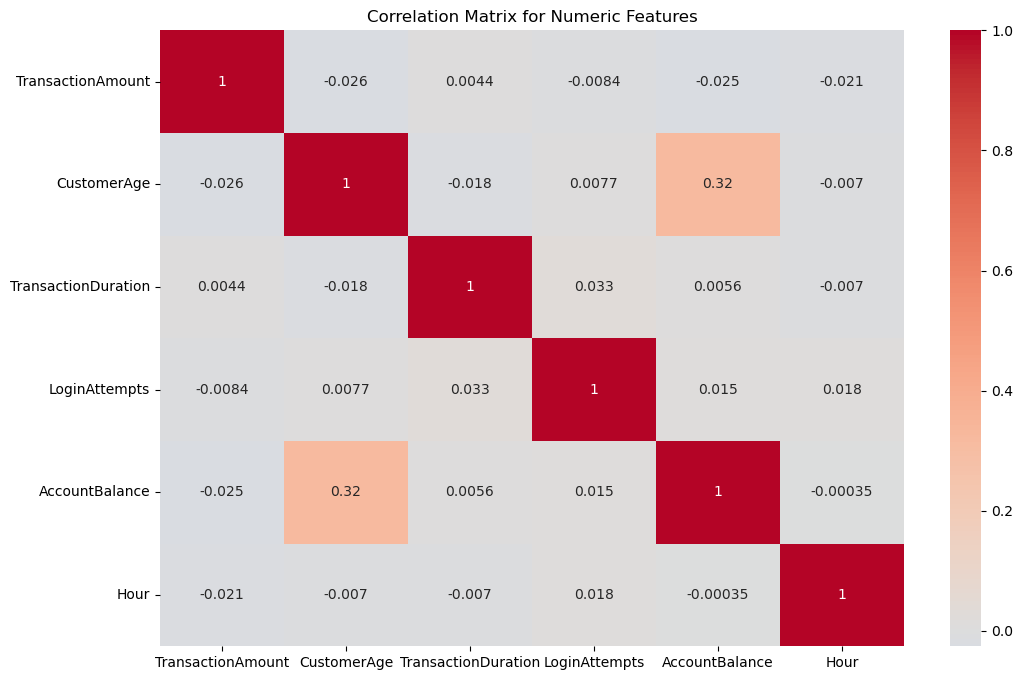

In [41]:
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix for Numeric Features")
plt.savefig('Correlation Matrix for Numeric Features.png')
plt.show()

A matriz de correlação mostra como as variáveis numéricas estão relacionadas entre si. Os valores variam de -1 (correlação negativa perfeita) a 1 (correlação positiva perfeita). Aqui está um resumo simples:

__Principais Observações:__

__1. Relação mais forte:__ CustomerAge e AccountBalance têm uma correlação positiva moderada (0.32), indicando que clientes mais velhos tendem a ter saldos mais altos.

__2. Relações fracas ou insignificantes__: A maioria das variáveis apresenta correlação muito baixa (próxima de 0), sugerindo que não há uma relação linear significativa entre elas. Exemplo: TransactionAmount tem correlação próxima de 0 com todas as outras variáveis.

__3. Sem correlações negativas relevantes__: Não há correlações negativas fortes entre as variáveis analisadas.

__Interpretação Geral__:
As variáveis parecem ser relativamente independentes entre si, exceto pela relação entre CustomerAge e AccountBalance, que pode ser explorada em análises futuras para entender o comportamento financeiro por idade.

### Login Attempts vs. Transaction Amount (Potential Fraud Indicator)

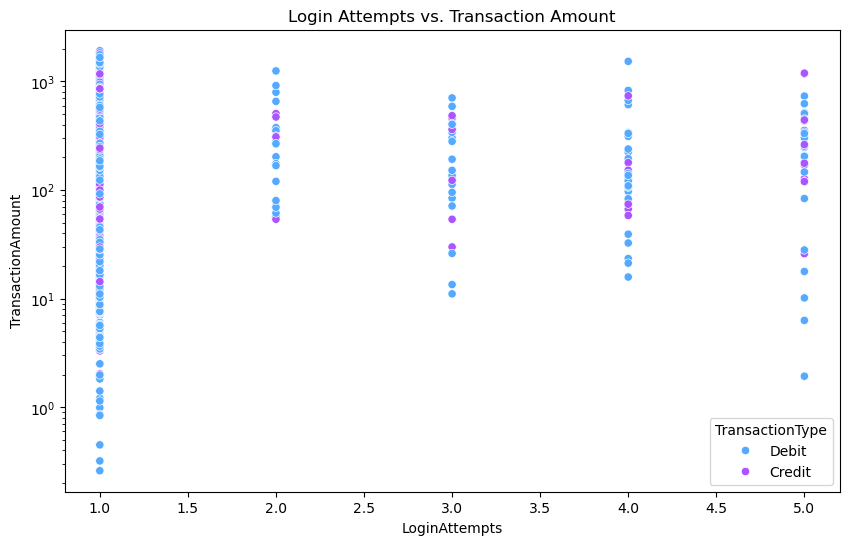

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LoginAttempts', y='TransactionAmount', hue='TransactionType', palette='cool')
plt.yscale('log')
plt.title("Login Attempts vs. Transaction Amount")
plt.savefig('Login Attempts vs. Transaction Amount.png')
plt.show()

O gráfico de dispersão apresenta a relação entre Login Attempts (tentativas de login) e Transaction Amount (valor da transação), categorizado por tipo de transação (Débito ou Crédito). Aqui está um resumo:

__Observações Gerais__:

__1. Distribuição Geral__: A maioria das transações ocorre com 1 tentativa de login, independentemente do tipo de transação ou valor da transação. À medida que as tentativas de login aumentam (de 2 a 5), o número de transações diminui.

__2. Valores das Transações__: A maioria dos valores está abaixo de R$1000, concentrando-se nas faixas mais baixas. Transações com valores mais altos (> R$1000) ocorrem ocasionalmente em qualquer número de tentativas de login.

__3. Diferença entre Débito e Crédito__: Não há diferenças significativas entre os padrões de Débito (azul) e Crédito (roxo). Ambos os tipos estão distribuídos de forma semelhante em relação às tentativas de login e valores das transações.

__Interpretação Geral__:
A maioria dos usuários conclui transações após apenas 1 tentativa de login, sugerindo que falhas de login são raras.
Não há uma relação clara entre o número de tentativas de login e o valor das transações.


 ### Time Gap Analysis (Transaction Frequency)

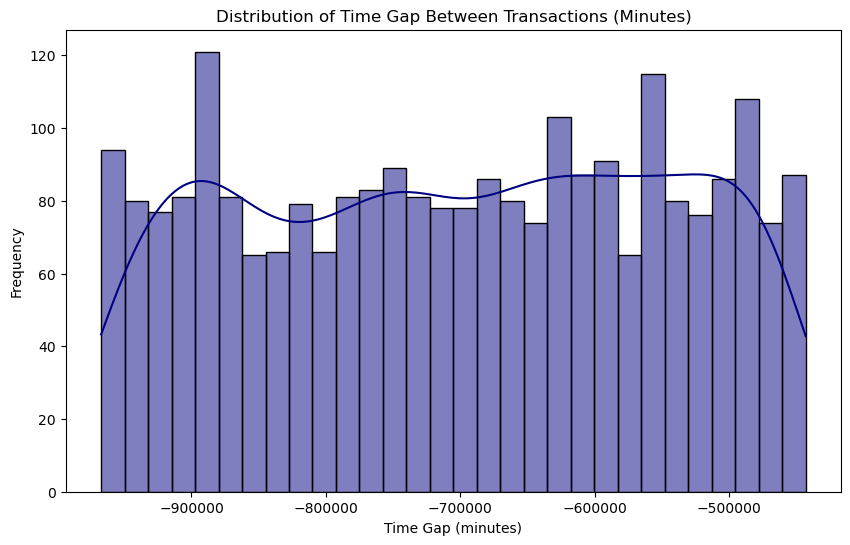

In [45]:
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])
df['TimeGap'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / 60
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TimeGap', bins=30, color='navy', kde=True)
plt.title("Distribution of Time Gap Between Transactions (Minutes)")
plt.xlabel("Time Gap (minutes)")
plt.ylabel("Frequency")
plt.savefig('Distribution of Time Gap Between Transactions (Minutes).png')
plt.show()

O gráfico mostra a distribuição do intervalo de tempo (Time Gap) entre transações, medido em minutos. Aqui está um resumo simples:

__Observações Gerais__:

__1. Distribuição Uniforme__: Os intervalos de tempo estão bem distribuídos ao longo do eixo, com frequências relativamente consistentes.

__2. Picos de Frequência__:Há alguns picos significativos em torno de -900.000 e -500.000 minutos, sugerindo que esses intervalos específicos ocorrem com mais frequência.

__3. Amplitude dos Intervalos__: O intervalo de tempo varia amplamente (de aproximadamente -1.000.000 a -500.000 minutos), indicando uma diversidade nos tempos entre transações.

__4. Curva de Tendência__: A linha suavizada sugere uma flutuação na frequência, mas sem uma forma clara ou tendência dominante.

__Interpretação Geral__:
A distribuição uniforme e os picos indicam que os tempos entre transações variam amplamente, mas certos períodos específicos podem estar associados a padrões de comportamento ou características do sistema.


### Channel Usage Patterns

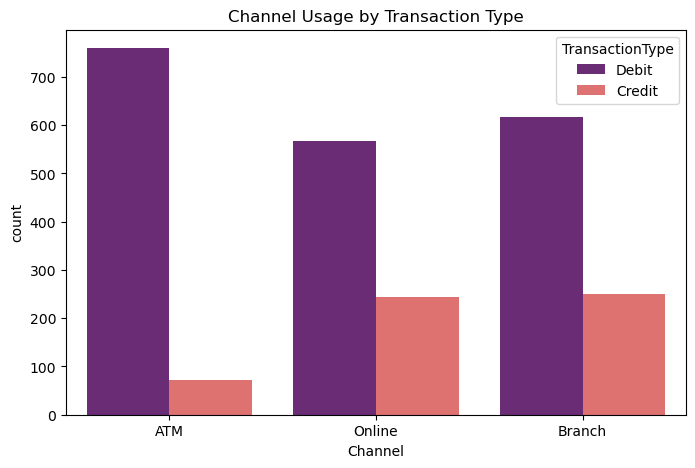

In [47]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Channel', hue='TransactionType', palette='magma')
plt.title("Channel Usage by Transaction Type")
plt.savefig('Channel Usage by Transaction Type.png')
plt.show()

O gráfico mostra o uso dos canais de transação (ATM, Online, e Branch) categorizado por tipo de transação (Débito e Crédito). Aqui está o resumo:

__Observações por Canal__:

__1. ATM__: É o canal mais utilizado, com a maioria das transações sendo de Débito. Transações de Crédito via ATM são raras.

__2. Online__: Segundo canal mais utilizado, com uma quantidade significativa de transações de Débito. Transações de Crédito também aparecem, mas em menor número.

__3. Branch (Agências)__: Possui uma distribuição similar ao canal Online, com predomínio de Débito e uma menor quantidade de Crédito.

__Resumo Geral__:
O canal ATM é claramente o mais popular, dominado por transações de Débito.
Transações de Crédito estão presentes em todos os canais, mas em menor quantidade em relação a Débito.

__Interpretação__:
O canal ATM parece ser o método preferido para transações de Débito, possivelmente devido à sua conveniência e facilidade de acesso.
O uso de Online e Branch sugere que esses canais também são importantes, mas com menor volume comparado ao ATM.


### DeviceID and IP Address Variation per Account (Anomaly Detection)

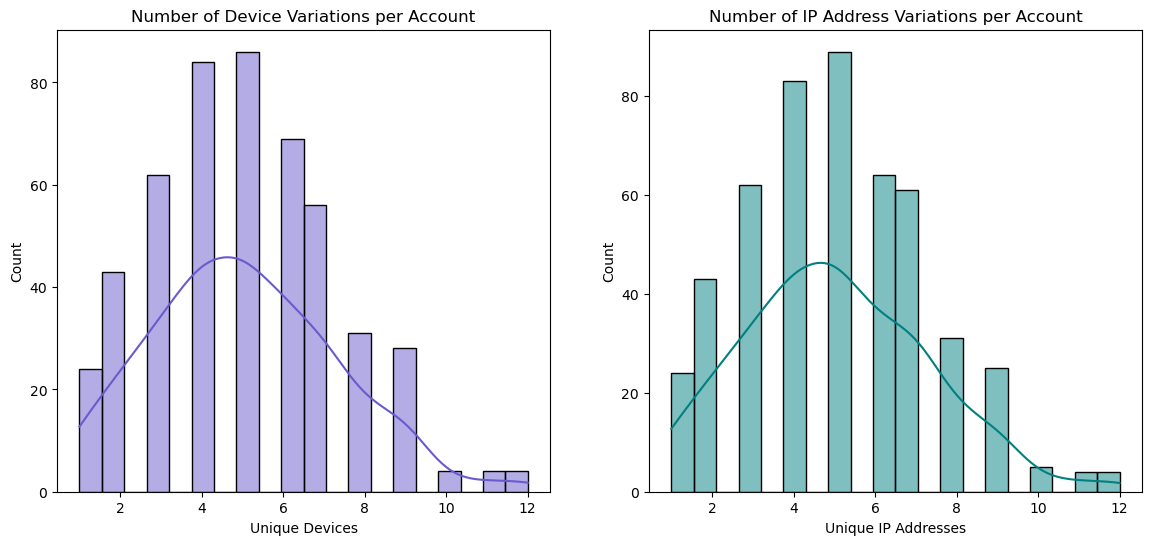

In [49]:
device_variations = df.groupby('AccountID')['DeviceID'].nunique()
ip_variations = df.groupby('AccountID')['IP Address'].nunique()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(device_variations, bins=20, color='slateblue', kde=True)
plt.title("Number of Device Variations per Account")
plt.xlabel("Unique Devices")
plt.subplot(1, 2, 2)
sns.histplot(ip_variations, bins=20, color='teal', kde=True)
plt.title("Number of IP Address Variations per Account")
plt.xlabel("Unique IP Addresses")
plt.savefig('Number of IP Address Variations per Account.png')
plt.show()

### Gráfico 1: Variação de Dispositivos Únicos por Conta

__1. Distribuição Geral__: A maioria das contas usa entre 3 e 6 dispositivos diferentes. Há um leve declínio na frequência para contas com mais de 6 dispositivos.

__2. Outliers__: Poucas contas apresentam mais de 10 dispositivos únicos, sugerindo comportamentos menos comuns.

__3. Padrão Geral__: A distribuição segue um formato semelhante ao de uma curva normal, com o pico entre 4 e 5 dispositivos.

### Gráfico 2: Variação de Endereços IP Únicos por Conta

__1. Distribuição Geral__: A maioria das contas utiliza entre 3 e 6 endereços IP diferentes. O número de contas diminui gradualmente para aquelas com mais de 6 IPs.

__2. Outliers__: Há poucas contas com mais de 10 endereços IP únicos, indicando um comportamento potencialmente incomum.

__3. Semelhança com Dispositivos__: A distribuição é semelhante ao gráfico de dispositivos, sugerindo que os padrões de uso de dispositivos e IPs são consistentes.
    
__Resumo Geral__:
A maioria dos usuários utiliza de 3 a 6 dispositivos ou IPs por conta, com poucos casos extremos acima de 10.
Esses padrões podem indicar comportamentos normais versus incomuns (possivelmente associados a atividades específicas ou suspeitas).



### Analyze Account Balance vs Transaction Amount

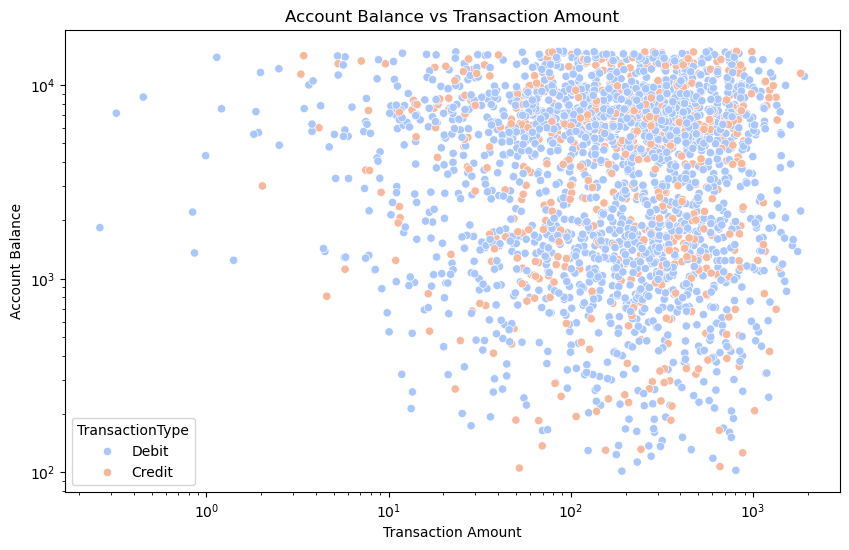

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance', hue='TransactionType', palette='coolwarm')
plt.xscale('log')
plt.yscale('log')
plt.title("Account Balance vs Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Account Balance")
plt.savefig('Account Balance vs Transaction Amount.png')
plt.show()


O gráfico de dispersão apresenta a relação entre o saldo da conta (Account Balance) e o valor da transação (Transaction Amount), diferenciando os tipos de transação (Débito e Crédito). Aqui está uma análise clara:

__Distribuição Geral__:

__1. Saldo da Conta__: O saldo das contas varia amplamente, de aproximadamente 100 a 10.000 unidades monetárias. A maioria dos pontos está concentrada em saldos menores, mas há dispersões em saldos altos.

__2. Valor da Transação__: A maior parte das transações ocorre com valores menores (até 1000 unidades monetárias). Valores mais altos de transações (acima de 1000) são menos frequentes e geralmente associados a contas com saldos maiores.

__3. Diferença entre Débito e Crédito__: Ambos os tipos de transação (Débito e Crédito) estão distribuídos de maneira semelhante, com maior concentração de transações de Débito. Transações de Crédito (pontos laranja) aparecem em menor quantidade, mas estão distribuídas ao longo de diferentes saldos e valores de transações.

__Tendência Geral__:
Não há uma relação linear clara entre saldo da conta e valor da transação, mas contas com saldos altos podem realizar transações maiores.
A maioria das transações é de valores baixos, independentemente do saldo da conta.

__Interpretação__:
A dispersão uniforme sugere que o saldo da conta não é um fator determinante direto para o valor da transação.
Transações de Débito são predominantes em todos os níveis de saldo e valor.

### Merchant Trends (Most Frequent Merchants)

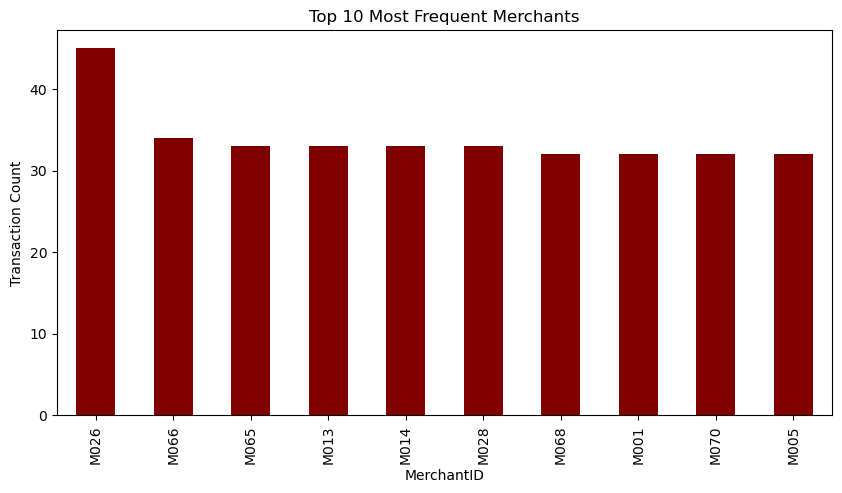

In [53]:
merchant_counts = df['MerchantID'].value_counts().head(10)
plt.figure(figsize=(10, 5))
merchant_counts.plot(kind='bar', color='maroon')
plt.title("Top 10 Most Frequent Merchants")
plt.xlabel("MerchantID")
plt.ylabel("Transaction Count")
plt.savefig('Top 10 Most Frequent Merchants.png')
plt.show()

O gráfico mostra os 10 comerciantes mais frequentes com base no número de transações realizadas. Aqui está um resumo claro:

__Observações Principais__:

__1. Comerciante Mais Frequente__: O comerciante M026 lidera com mais de 40 transações, sendo o mais popular entre os analisados.

__2. Outros Comerciantes Relevantes__: Comerciantes como M066, M065, M013, e M014 seguem na lista, com uma frequência próxima de 30 a 35 transações cada. Os outros comerciantes no Top 10 (como M028, M068, M001, M070, e M005) possuem frequências similares, mostrando pouca diferença no volume de transações.

__3. Destaque Geral__: O comerciante M026 se destaca significativamente em relação aos outros, com uma margem considerável de transações a mais.

__Interpretação__:
O comerciante M026 pode estar associado a produtos ou serviços de alta demanda ou conveniência.
A distribuição equilibrada entre os demais comerciantes sugere que os clientes têm uma variedade moderada de opções.

### Chi-Square Test of Independence (Categorical Relationship)

In [55]:
contingency_table = pd.crosstab(df['TransactionType'], df['Channel'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print("\nChi-Square Test between TransactionType and Channel")
print(f"Chi2 Statistic: {chi2}, p-value: {p}")


Chi-Square Test between TransactionType and Channel
Chi2 Statistic: 136.90539694747218, p-value: 1.8679738038721596e-30


#### The Chi-Square Test of Independence is a statistical test used to determine if there is a significant association between two categorical variables. It helps answer questions like, "Are gender and product preference related?" or "Is transaction type associated with customer location?"

Since the p-value is so low, we can conclude with high confidence that there is a statistically significant association between TransactionType and Channel.

## K-means Clustering

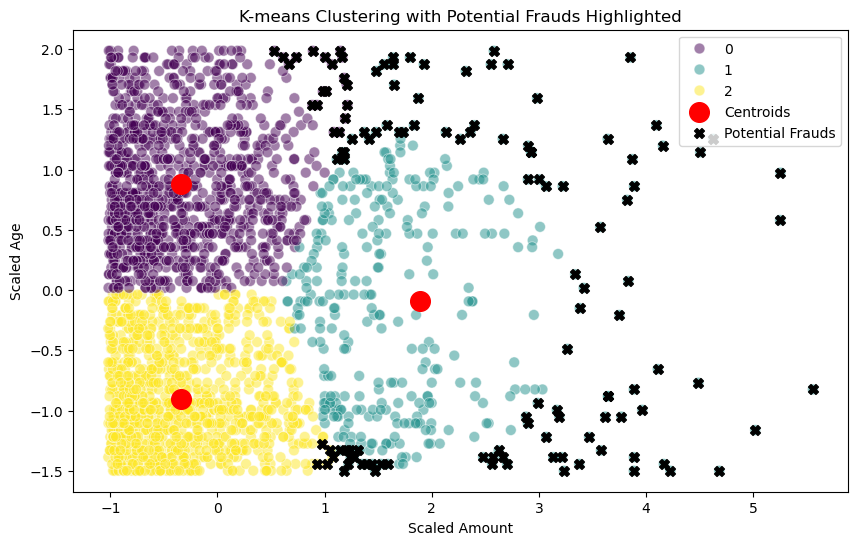

Number of potential frauds detected: 126


In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X = df[['TransactionAmount', 'CustomerAge']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add labels to the dataset
df['KMeans_Cluster'] = kmeans_labels


# Calculate distance of each point to its assigned cluster centroid
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)  # Change this value as needed

# Flag points above the threshold as potential frauds
df['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = df[df['Potential_Fraud']]
non_frauds = df[~df['Potential_Fraud']]

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1], 
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('K-means Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.savefig('K-means Clustering with Potential Frauds Highlighted.png')
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")


O gráfico apresenta o resultado de um clustering usando o algoritmo K-means para identificar fraudes potenciais em um conjunto de dados. Aqui está o resumo:

__Componentes do Gráfico__:

__1.Clusters__:
Três clusters principais são destacados com cores diferentes (Roxo, Amarelo, e Ciano), representando agrupamentos de clientes com base em variáveis como Idade Escalada (Scaled Age) e Valor Escalado da Transação (Scaled Amount).
	•	Cada cluster possui um centroide marcado em vermelho.

__2.Fraudes Potenciais__: 126 pontos pretos (destacados como “Potential Frauds”) representam transações ou usuários que foram classificados fora dos agrupamentos principais, indicando comportamento potencialmente anômalo ou suspeito.

__3.Centroides__: Os centroides, marcados em vermelho, indicam o ponto central de cada cluster baseado na média das características.
    
__Interpretação Geral__:

__1.Clusters de Comportamento Normal__: A maioria dos pontos se agrupa nos três clusters principais, sugerindo padrões normais e consistentes de transações dentro desses grupos.

__2.Fraudes Potenciais__: Os pontos pretos (fora dos clusters principais) são transações ou clientes que não se ajustam aos padrões normais de comportamento, tornando-se candidatos para uma investigação mais aprofundada.

__3. Aplicação Prática__:
Esse método pode ser usado para priorizar a análise de transações anômalas em sistemas de detecção de fraudes, ajudando a equipe a identificar casos de alto risco de maneira eficiente.

## DBSCAN Clustering on Transactions

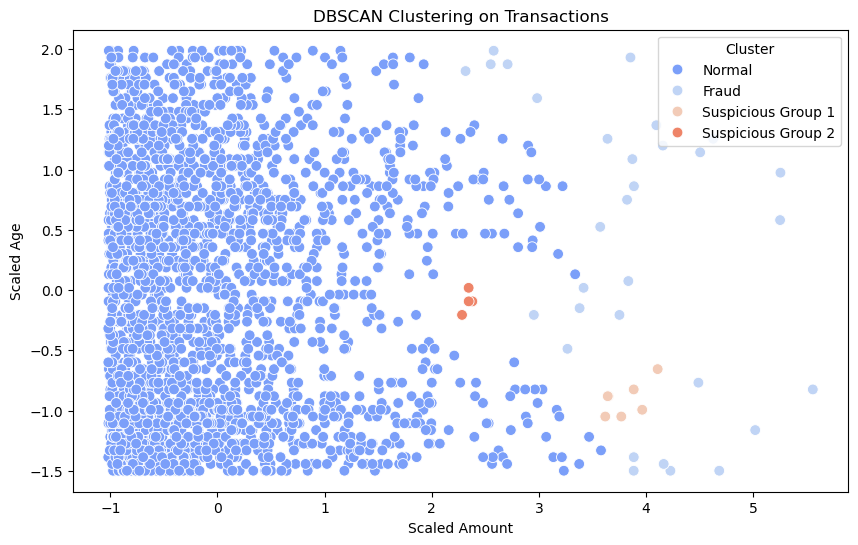

In [60]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusted DBSCAN clustering with a refined eps value
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust eps based on k-distance elbow
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add labels to the dataset
df['DBSCAN_Cluster'] = dbscan_labels

# Map the cluster labels to descriptive names
label_mapping = {-1: 'Fraud', 0: 'Normal', 1: 'Suspicious Group 1', 2: 'Suspicious Group 2'}
df['DBSCAN_Cluster'] = df['DBSCAN_Cluster'].map(label_mapping)

# Plotting with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['DBSCAN_Cluster'], palette='coolwarm', s=60)
plt.title('DBSCAN Clustering on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.savefig('DBSCAN Clustering on Transactions.png')
plt.show()


O gráfico apresenta os resultados do clustering utilizando o algoritmo DBSCAN para categorizar transações em grupos, incluindo fraudes e comportamentos suspeitos. Aqui está o resumo:

__Componentes do Gráfico__:

__1.Clusters Identificados__:
- Normal (Azul): A maior parte dos pontos pertence ao cluster normal, representando transações regulares sem comportamento anômalo.
- Fraud (Cinza claro): Transações claramente identificadas como fraudulentas.
- Suspicious Group 1 (Laranja claro): Um pequeno grupo de transações com comportamento atípico, mas não classificadas como fraudes diretas.
- Suspicious Group 2 (Laranja escuro): Outro grupo pequeno, ainda mais isolado, indicando maior risco ou comportamento incomum.

__2.Distribuição dos Pontos__:
- A maioria das transações normais está concentrada em uma região densa (na parte inferior esquerda do gráfico).
- Fraudes e grupos suspeitos estão mais espalhados, fora da região principal.
    
__Interpretação Geral__:

__1.Normal__: A grande densidade no cluster “Normal” reflete padrões transacionais esperados e comuns.

__2.Fraudes__: Transações fraudulentas (cinza claro) são dispersas e afastadas do grupo principal, indicando comportamentos fora do padrão.

__3.Grupos Suspeitos__: Os dois grupos suspeitos (laranja claro e escuro) são intermediários entre normal e fraudulento, necessitando de investigação mais detalhada.

__4.Utilidade Prática__: DBSCAN é eficaz para identificar fraudes e comportamentos suspeitos em dados com padrões não lineares, destacando áreas que requerem atenção.


## Hierarchical Clustering on Transactions

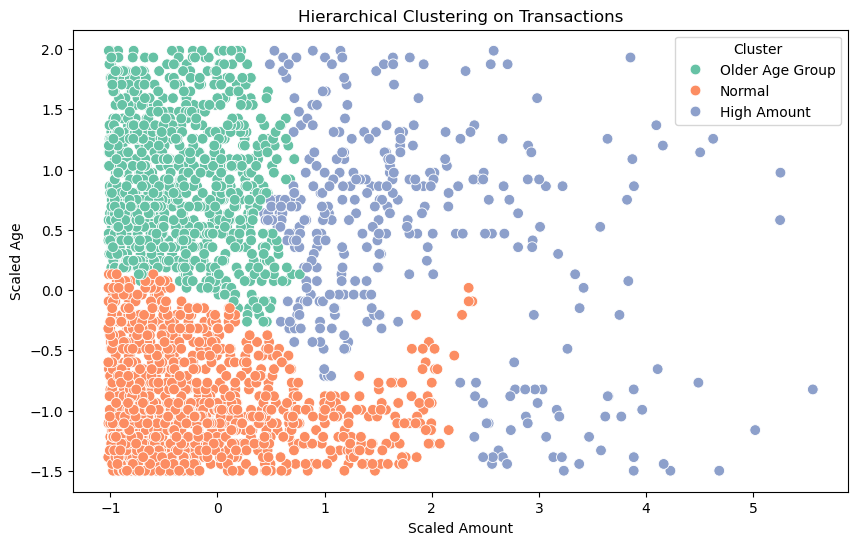

In [62]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)


# Add labels to the dataset
df['Hierarchical_Cluster'] = hierarchical_labels

# Mapping the cluster labels to descriptive names
cluster_mapping = {0: 'Normal', 1: 'High Amount', 2: 'Older Age Group'}
df['Hierarchical_Cluster'] = df['Hierarchical_Cluster'].map(cluster_mapping)

# Plot with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Hierarchical_Cluster'], palette='Set2', s=60)
plt.title('Hierarchical Clustering on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.savefig('Hierarchical Clustering on Transactions.png')
plt.show()


O gráfico representa o agrupamento hierárquico aplicado às transações, dividindo os dados em três grupos principais. Aqui está um resumo:

__Descrição dos Clusters__:

__1.Older Age Group (Verde__): Agrupa clientes com idades mais altas. Esses clientes realizam principalmente transações de valores menores (distribuídos à esquerda no eixo de valores escalados).

__2.Normal (Azul)__: Representa transações regulares, que abrangem uma variedade de idades e valores de transação. Os pontos estão amplamente distribuídos pelo gráfico.

__3. High Amount (Laranja)__: Agrupa transações de valores altos, independentemente da idade. Concentrado na parte inferior direita, indicando valores elevados no eixo de valores escalados.
    
__Interpretação Geral__:

__1.Idade vs. Valor__: O agrupamento separa efetivamente clientes mais velhos e aqueles que realizam transações de alto valor. Clientes com transações normais (azul) são mais variados e distribuídos em ambos os eixos.

__2.Utilidade Prática__:
Esse tipo de agrupamento pode ser usado para entender perfis distintos de clientes:
- __Grupo verde__: Clientes mais velhos com padrões transacionais consistentes.
- __Grupo azul__: Transações regulares, representando a maioria.
- __Grupo laranja__: Transações de maior risco devido a valores elevados.

## Isolation Forest for Anomaly Detection 

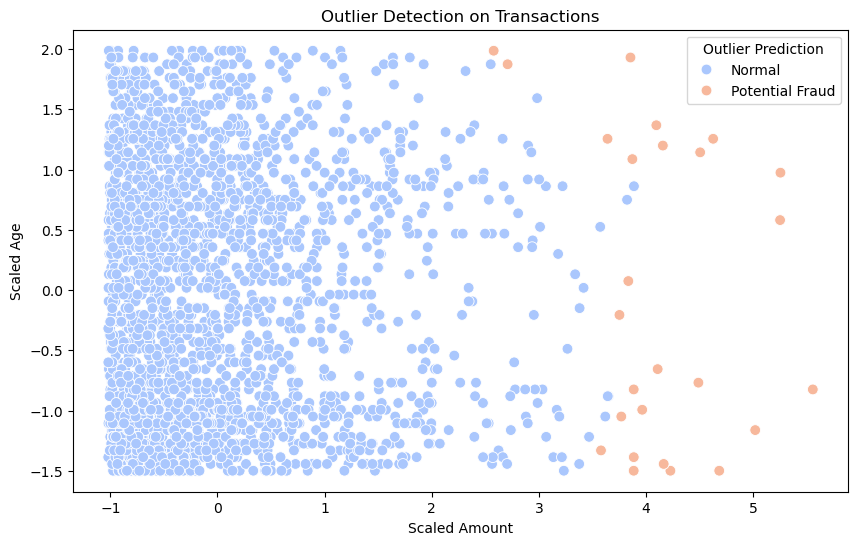

In [64]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest to identify anomalies
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Set contamination rate to expected fraud rate
outlier_pred = iso_forest.fit_predict(X_scaled)

# Map the results (-1 for outliers, 1 for normal) to descriptive labels
outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}
df['Outlier_Prediction'] = pd.Series(outlier_pred).map(outlier_mapping)

# Plotting with isolation forest outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Outlier_Prediction'], palette='coolwarm', s=60)
plt.title('Outlier Detection on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Outlier Prediction')
plt.savefig('Outlier Detection on Transactions.png')
plt.show()


O gráfico apresenta os resultados de uma análise de detecção de outliers aplicada às transações. Aqui está um resumo das informações:

__Componentes do Gráfico__:

__1.Normal (Azul)__: Representa transações que seguem padrões regulares, com base nos atributos analisados (Idade Escalada e Valor Escalado da Transação). A maioria dos pontos no gráfico pertence a esta categoria, indicando que a maior parte das transações é classificada como normal.

__2.Potential Fraud (Laranja)__: Representa transações identificadas como potenciais fraudes (outliers). Essas transações estão localizadas fora da densidade principal de pontos azuis, indicando que possuem características fora do padrão.
    
__Padrões Identificados__:

__1.Distribuição de Outliers__: A maioria das fraudes potenciais está associada a valores altos de transação (eixo X maior que 3), independentemente da idade escalada. Há também algumas fraudes potenciais dispersas em valores mais baixos.

__2.Transações Normais__: Estão concentradas à esquerda (valores baixos de transação) e distribuídas por várias idades, formando uma densidade clara no gráfico.
    
__Interpretação Geral__:

__Fraudes Potenciais__: As transações fora do padrão (laranja) indicam casos que precisam de investigação mais detalhada, especialmente em valores elevados.
__Normalidade__: A concentração de pontos azuis sugere que a maioria das transações segue padrões esperados.

__Aplicação Prática__:
Este modelo pode ser usado como uma ferramenta inicial para filtrar transações suspeitas em sistemas de detecção de fraudes, priorizando os casos mais incomuns para investigação.

### evaluation for Isolation Forest

In [85]:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Supor que você tenha rótulos verdadeiros para avaliação
# 1: Fraudulent, 0: Normal
frauds = df['Potential_Fraud']
y_pred = (df['Outlier_Prediction'] == 'Potential Fraud').astype(int)

# Confusion Matrix
cm = confusion_matrix(frauds, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(frauds, y_pred, target_names=['Normal', 'Fraudulent'])
print("Classification Report:\n", cr)

# ROC-AUC Score
roc_auc = roc_auc_score(frauds, y_pred)
print(f"ROC-AUC Score: {roc_auc}")

Confusion Matrix:
 [[2386    0]
 [ 100   26]]
Classification Report:
               precision    recall  f1-score   support

      Normal       0.96      1.00      0.98      2386
  Fraudulent       1.00      0.21      0.34       126

    accuracy                           0.96      2512
   macro avg       0.98      0.60      0.66      2512
weighted avg       0.96      0.96      0.95      2512

ROC-AUC Score: 0.6031746031746031


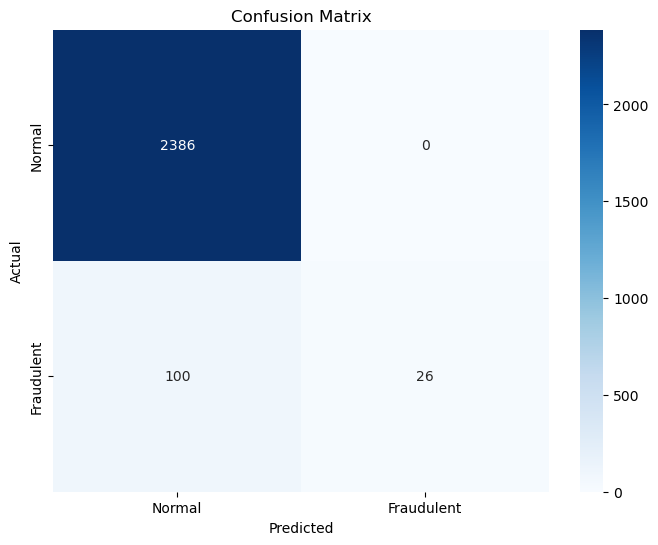

In [109]:
# Configura o gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Fraudulent'], yticklabels=['Normal', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Salva o gráfico
plt.savefig('confusion_matrix.png')
plt.show()

__Confusion Matrix:__ Representa o desempenho da classificação, com a distribuição de predições corretas e incorretas __(True Positives, True Negatives, False Positives e False Negatives)__.

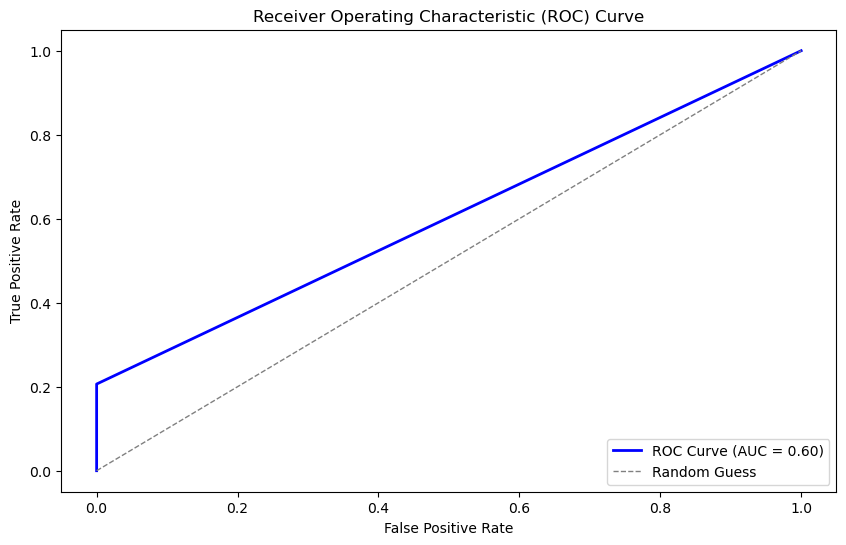

In [125]:
from sklearn.metrics import roc_curve, roc_auc_score

frauds = df['Potential_Fraud']
y_pred = (df['Outlier_Prediction'] == 'Potential Fraud').astype(int)
# Calcula a curva ROC e o AUC
fpr, tpr, thresholds = roc_curve(frauds, y_pred)

# Configura o gráfico
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Salva o gráfico
plt.savefig('roc_curve.png')
plt.show()

In [127]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, frauds, test_size=0.3, random_state=42)

best_contamination = 0
best_auc = 0

# Test different contamination rates
for contamination in np.arange(0.01, 0.1, 0.01):  # Testing from 1% to 10%
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    y_pred = iso_forest.fit(X_train).predict(X_test)
    y_pred_binary = (y_pred == -1).astype(int)  # -1 means outlier
    
    # Calculate ROC-AUC
    auc = roc_auc_score(y_test, y_pred_binary)
    
    if auc > best_auc:
        best_auc = auc
        best_contamination = contamination

print(f"Best Contamination: {best_contamination}, Best ROC-AUC: {best_auc}")

Best Contamination: 0.08, Best ROC-AUC: 0.8851890756302521


### Deploy Machine Learning Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

numeric_cols = ['TransactionAmount', 'TransactionDuration', 'AccountBalance']
X = df[numeric_cols + ['KMeans_Cluster', 'DBSCAN_Cluster']]
y = frauds  # Replace with actual fraud labels

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

### Threshold Optimization

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(frauds, df['FraudScore'])
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.legend()
plt.title('Precision-Recall Tradeoff')
plt.show()

### Save model

In [93]:
import pickle

# Save the trained model
with open('isolation_forest_model.pkl', 'wb') as file:
    pickle.dump(iso_forest, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [99]:
from flask import Flask, request, jsonify
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# Load the trained model and scaler
model = pickle.load(open('isolation_forest_model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

# Initialize Flask app
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from the request
    data = request.json
    
    # Transform data using the scaler
    X = np.array([data['TransactionAmount'], data['CustomerAge']]).reshape(1, -1)
    X_scaled = scaler.transform(X)
    
    # Predict using the model
    prediction = model.predict(X_scaled)
    
    # Map prediction to descriptive labels
    result = 'Potential Fraud' if prediction[0] == -1 else 'Normal'
    
    return jsonify({'prediction': result})

if __name__ == '__main__':
    app.run(debug=True, port=1041)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:1041
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/denilsondias/.local/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/denilsondias/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/Users/denilsondias/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/denilsondias/.local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 692, in initialize
    self.init_sockets()
  File "/Users/denilsondias/.local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 331, in init_sockets
    self.shell_port = s

SystemExit: 1

#### by Denilson Panzo
##### November 2024